# **Covid-19 Data Analysis Project**

This is a data analysis project based on the dataset that can be obtained in Our World in Data visit the site [here](https://ourworldindata.org/coronavirus).

In this project, I will go through in an adventure of how to analyze and visualize the data to make it more understandable for everyone.

As I start with this project, I do not have any ideas on what to do with the data. The data I will be obtaining is raw as it came directly from the website and when I initially checked it it look like it hasn't been processed yet for data analysis.

The Data gathered here is updated until October 18, 2023 so its quite up-to-date.

Let's go and see what can we find out in this data journey.

In [1]:
# Import packages needed for the Data Analysis project.
# I will import other packages if needed as I go along.

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


print('done')

done


### **Importing the dataset**

Now, I will be importing the dataset obtained from Our World in Data.

In [2]:
df_covid = pd.read_csv('/content/owid-covid-data.csv')
df_covid['date'] = pd.to_datetime(df_covid['date'])
df_covid.head(20)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-01-10,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-01-11,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-01-12,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [3]:
#check for the shape of the dataset
df_covid.shape

(319306, 67)

This shows in the data that the data gathering started on  3 Jan 2023 until 18 October 2023. There are 350,019 rows for the datasets and 67 columns. From the way this looks, this is a list of all the countries in the world with all the cases from a day to day basis. Other details on that day are in the other columns of the dataset.

Now, I will check first the comparison of the datas from each region in the world by number of confirmed cases and deaths.

### **Total number of confirmed cases in the world**

In [4]:
df_accumulated = df_covid['new_cases'].groupby(df_covid['continent']).sum()
df_accumulated

continent
Africa            12328336.0
Asia             287617108.0
Europe           219484096.0
North America     21029185.0
Oceania           14481036.0
South America     67251299.0
Name: new_cases, dtype: float64

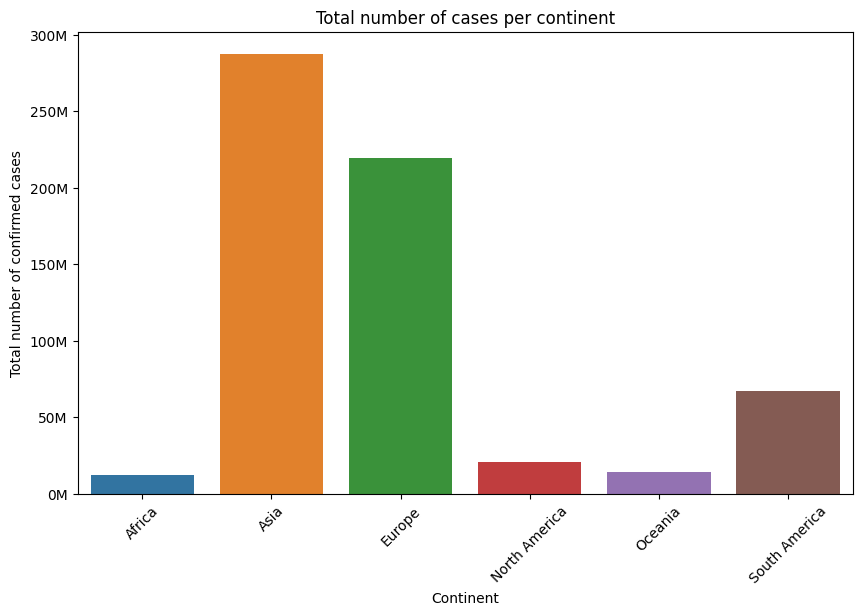

In [5]:
#total number of confirmed cases in the world per continent
plt.figure(figsize=(10,6))
sns.barplot(x= df_accumulated.index, y=df_accumulated.values)

def millions_formatter(x, pos):
    return f'{int(x/1e6)}M'
plt.gca().yaxis.set_major_formatter(millions_formatter)
plt.title('Total number of cases per continent')
plt.xlabel('Continent')
plt.ylabel('Total number of confirmed cases')
plt.xticks(rotation=45)
plt.show()

### **Total number of deaths in the world**

In [6]:
df_deaths =  df_covid['new_deaths'].groupby(df_covid['continent']).sum()
df_deaths

continent
Africa            245613.0
Asia             1584577.0
Europe           1739482.0
North America     476385.0
Oceania            29973.0
South America    1346449.0
Name: new_deaths, dtype: float64

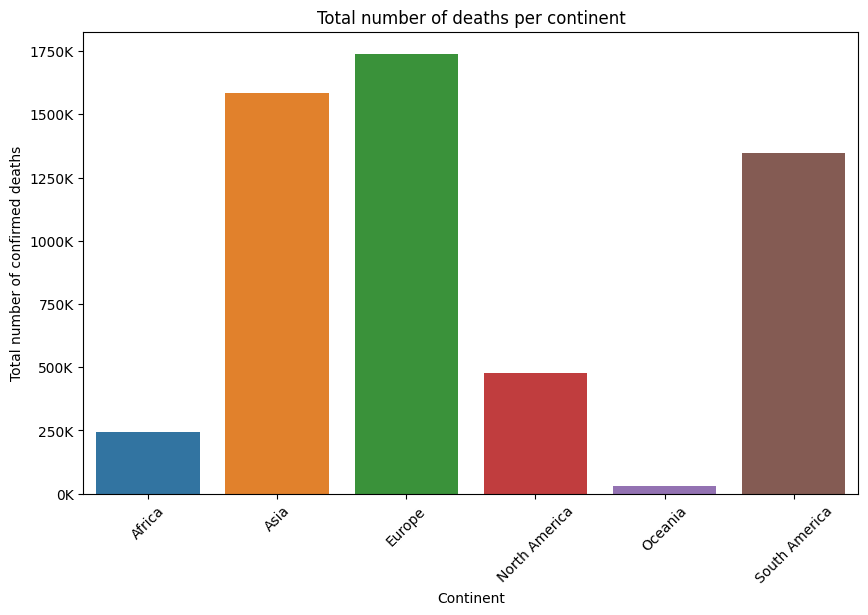

In [7]:
#total number of confirmed cases in the world per continent
plt.figure(figsize=(10,6))
sns.barplot(x= df_deaths.index, y=df_deaths.values)

def millions_formatter(x, pos):
    return f'{int(x/1e3)}K'
plt.gca().yaxis.set_major_formatter(millions_formatter)
plt.title('Total number of deaths per continent')
plt.xlabel('Continent')
plt.ylabel('Total number of confirmed deaths')
plt.xticks(rotation=45)
plt.show()

Based on the data it shows that Asia is the continent that has the most number of confirmed cases in the world. However, Europe is the continent which the most confirmed number covid deaths.

I will also look into the proportion, on which continent has the biggest proportion of deaths per number of confirmed cases.

In [8]:
proportion = (df_deaths / df_accumulated) *100
proportion

continent
Africa           1.992264
Asia             0.550933
Europe           0.792532
North America    2.265352
Oceania          0.206981
South America    2.002116
dtype: float64

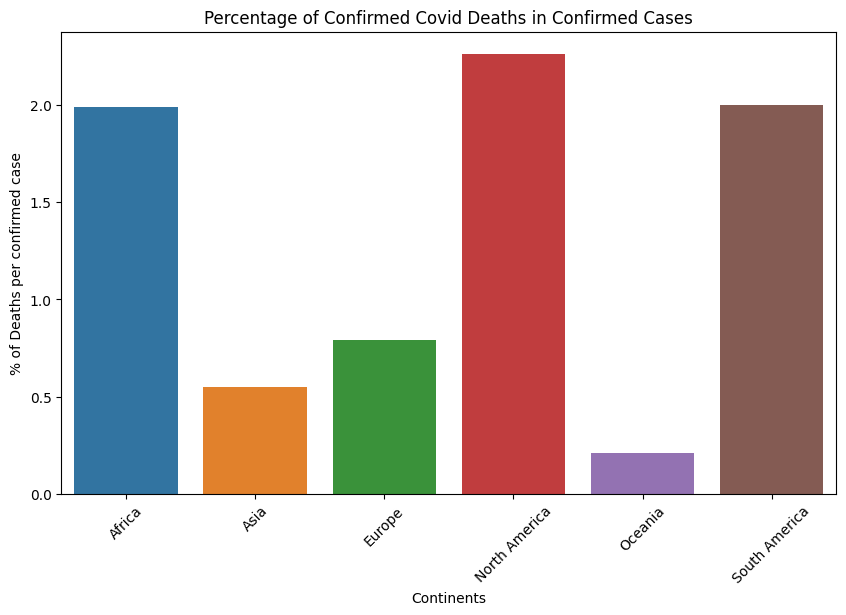

In [9]:
#visualization

plt.figure(figsize=(10,6))
sns.barplot(x=proportion.index, y=proportion.values)
plt.xlabel('Continents')
plt.ylabel('% of Deaths per confirmed case')
plt.title('Percentage of Confirmed Covid Deaths in Confirmed Cases')
plt.xticks(rotation=45)
plt.show()


Based on the data and the visualization presented here, even though Europe has the most number of deaths for each continent, It was South America and Africa that has the most percentage of deaths from their confirmed cases in the world. Probably hinting with the effect of socio-economic status with the number of deaths. Though I don't want to focus on that right now.


#### **Goal:**
I will be using the datas from Philippines and Canada for analysis I also want to check if there is really a surge in cases for these two countries and also do some comparisons with it.


In [10]:
#Extract data only from Philippines

df_PH = df_covid[(df_covid['location'] == 'Philippines')]

df_PH.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
245051,PHL,Asia,Philippines,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,40.8,78.463,1.0,71.23,0.718,115559008.0,NaN,NaN,NaN,NaN
245052,PHL,Asia,Philippines,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,40.8,78.463,1.0,71.23,0.718,115559008.0,NaN,NaN,NaN,NaN
245053,PHL,Asia,Philippines,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,40.8,78.463,1.0,71.23,0.718,115559008.0,NaN,NaN,NaN,NaN
245054,PHL,Asia,Philippines,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,40.8,78.463,1.0,71.23,0.718,115559008.0,NaN,NaN,NaN,NaN
245055,PHL,Asia,Philippines,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,40.8,78.463,1.0,71.23,0.718,115559008.0,NaN,NaN,NaN,NaN


In [11]:
#isolate for Canada

df_CAD = df_covid[(df_covid['location'] == 'Canada')]

df_CAD.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
52640,CAN,North America,Canada,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
52641,CAN,North America,Canada,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
52642,CAN,North America,Canada,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,16.6,NaN,2.5,82.43,0.929,38454328.0,-200.1,-3.12,-3.12,-5.281258
52643,CAN,North America,Canada,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
52644,CAN,North America,Canada,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN


In [12]:
df_PH.shape, df_CAD.shape

((1385, 67), (1385, 67))

Now I have extracted the data for both countries. I will now start that data journey for these two.

In [13]:
df_PH.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

### **Comparison of Cases**

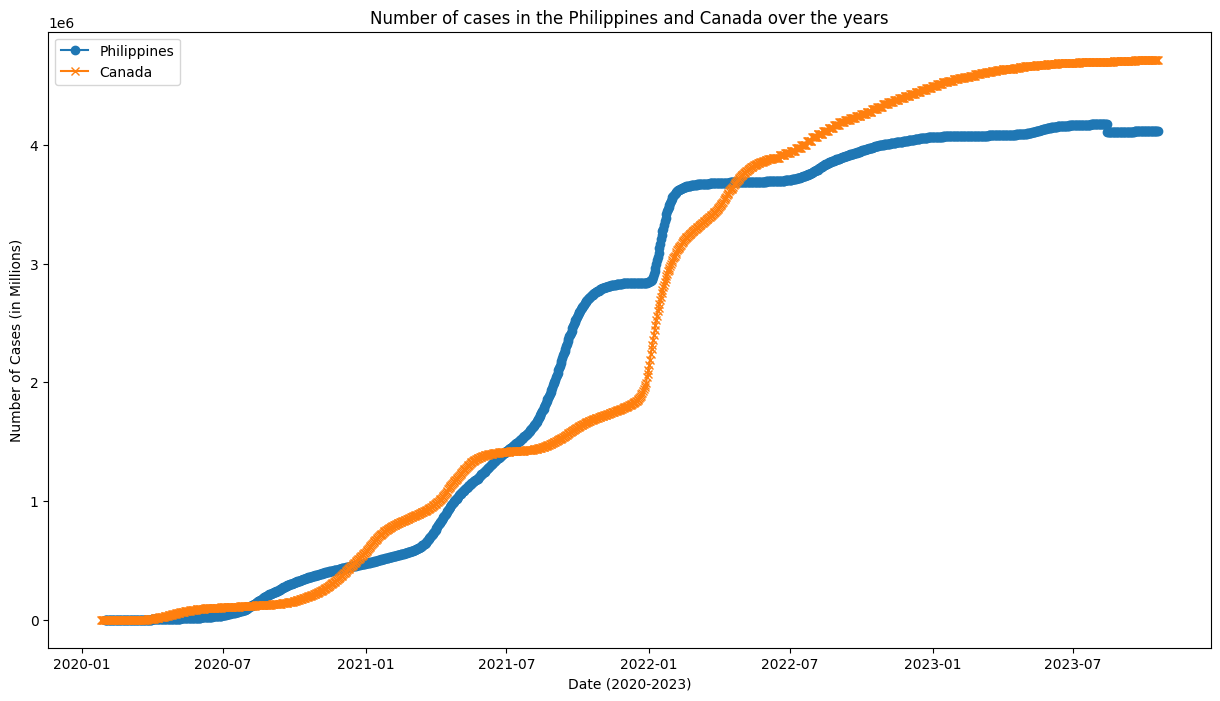

In [14]:
plt.figure(figsize= (15,8))
plt.plot(df_PH['date'], df_PH['total_cases'], label='Philippines', marker='o')
plt.plot(df_CAD['date'], df_CAD['total_cases'], label='Canada', marker='x')
plt.legend()
plt.xlabel('Date (2020-2023)')
plt.ylabel('Number of Cases (in Millions)')
plt.title('Number of cases in the Philippines and Canada over the years')
plt.show()


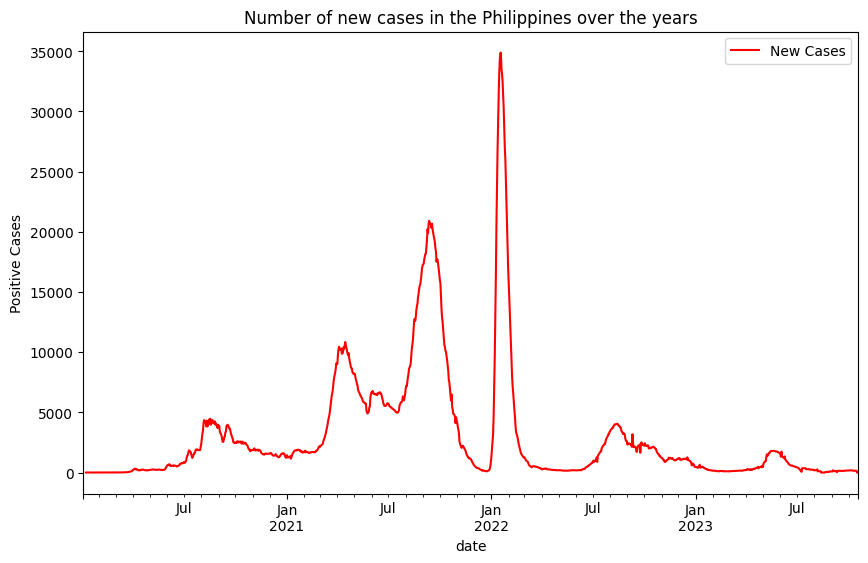

In [15]:
df_PH.plot(figsize = (10,6), x='date', y='new_cases_smoothed', label = 'New Cases', color='red')
plt.title('Number of new cases in the Philippines over the years')
plt.ylabel('Positive Cases')
plt.show()

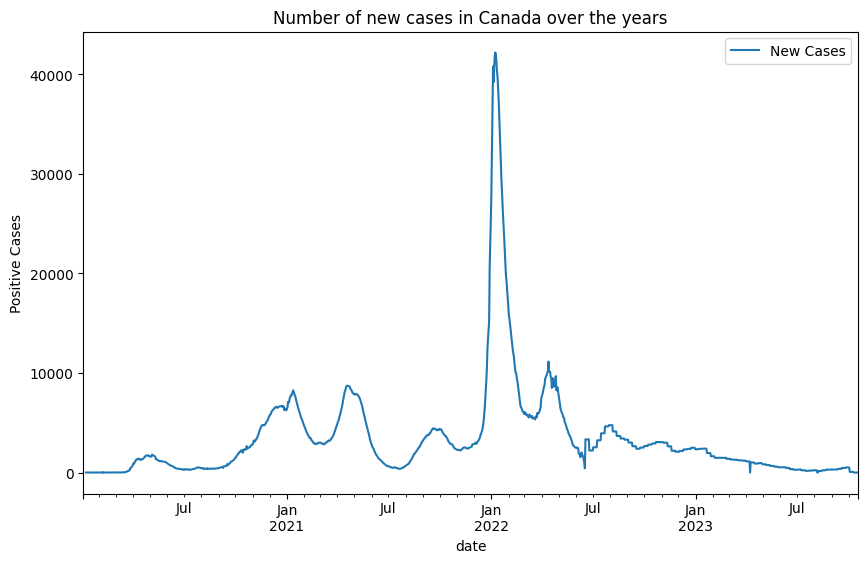

In [19]:
df_CAD.plot(figsize = (10,6), x='date', y='new_cases_smoothed', label='New Cases')
plt.title('Number of new cases in Canada over the years')
plt.ylabel('Positive Cases')
plt.show()

The graph shows that the trend of increase in Covid-19 cases is almos the same for both countries and it also showed that Canada had more cases of confirmed positive cases it was also the case in one of my previous data analysis for Covid even though the data for that was just around 2020. The question in that analysis was whether it was because of a higher amount of testing for the developed countries that's why the number of cases are higher. I will also check if there is a significant statistical difference between the two means of the two separated datasets using a t-test.

In [16]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(df_PH['new_cases'].dropna(), df_CAD['new_cases'].dropna())

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -1.7874933964524122
P-value: 0.07396722835838773


Based on the result of the t-test it shows that the mean of the PH dataset is lower by 1.7875 compared to the mean of the CAD dataset. Also we had a P-value of 0.074 (and in statistics, any value below 0.05 means there is a significant difference between the mean total cases for the two countries), which shows that there is somewhat a difference between the means but since the p-value is 0.07 the difference is not statistically significant for these two countries.

#### **Analyzing Deaths**

Now I will be analyzing the covid deaths in the two datasets.

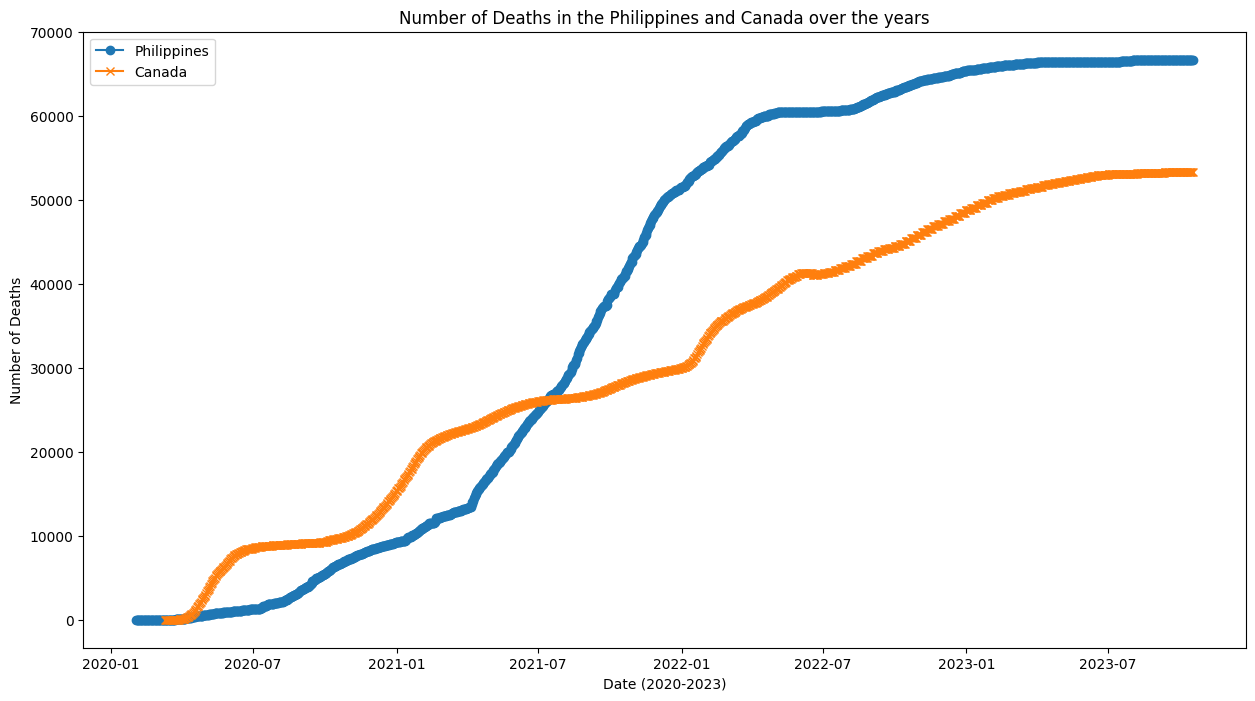

In [17]:
plt.figure(figsize= (15,8))
plt.plot(df_PH['date'], df_PH['total_deaths'], label='Philippines', marker='o')
plt.plot(df_CAD['date'], df_CAD['total_deaths'], label='Canada', marker='x')
plt.legend()
plt.xlabel('Date (2020-2023)')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths in the Philippines and Canada over the years')
plt.show()

Text(0, 0.5, 'Deaths')

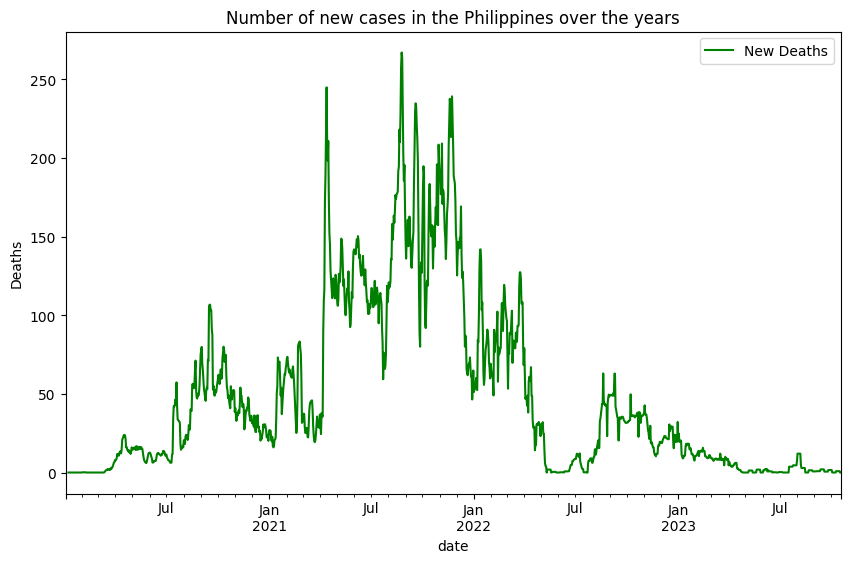

In [18]:
df_PH.plot(figsize = (10,6), x='date', y='new_deaths_smoothed', label='New Deaths', color='green')
plt.title('Number of new cases in the Philippines over the years')
plt.ylabel('Deaths')

Text(0, 0.5, 'Deaths')

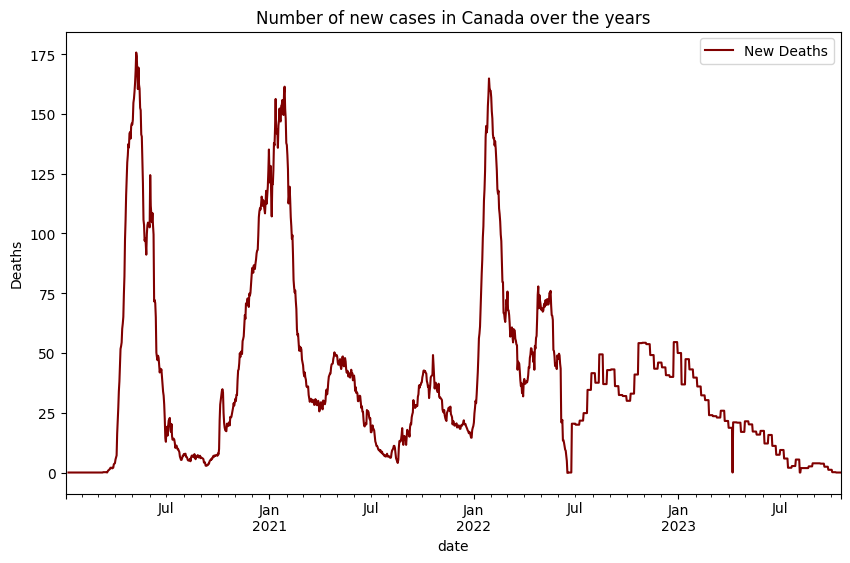

In [19]:
df_CAD.plot(figsize = (10,6), x='date', y='new_deaths_smoothed', label='New Deaths', color='maroon')
plt.title('Number of new cases in Canada over the years')
plt.ylabel('Deaths')

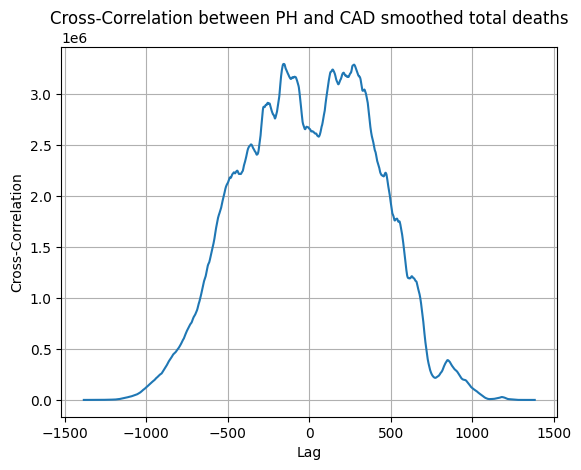

In [20]:
# Computing for the cross-correlation of the death rate in both countries
cross_corr = np.correlate(df_PH['new_deaths_smoothed'].fillna(0), df_CAD['new_deaths_smoothed'].fillna(0), mode='full')

# Plotting
lags = np.arange(-len(df_PH) + 1, len(df_PH))
plt.plot(lags, cross_corr)
plt.title('Cross-Correlation between PH and CAD smoothed total deaths')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.grid(True)
plt.show()

Based on the result of the cross correlation on the deaths between these two countries. It tells that both countries experienced similar patterns during the whole period of the pandemic. Although this just shows the similarity of the trends of deaths.

## **Checking if there was really a surge in cases this past few months**

Now I will try to analyze if the cases are really starting to surge again starting from August 2023.

First I will try to subset the datasets starting from August 2023 onwards.

In [21]:
subset_PH = df_PH[df_PH['date'] >= '2023-08-01']
subset_PH

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
246357,PHL,Asia,Philippines,2023-08-01,4172920.0,0.0,186.000,66592.0,50.0,7.143,...,40.8,78.463,1.0,71.23,0.718,115559008.0,NaN,NaN,NaN,NaN
246358,PHL,Asia,Philippines,2023-08-02,4172920.0,0.0,186.000,66626.0,34.0,12.000,...,40.8,78.463,1.0,71.23,0.718,115559008.0,NaN,NaN,NaN,NaN
246359,PHL,Asia,Philippines,2023-08-03,4172920.0,0.0,186.000,66626.0,0.0,12.000,...,40.8,78.463,1.0,71.23,0.718,115559008.0,NaN,NaN,NaN,NaN
246360,PHL,Asia,Philippines,2023-08-04,4172920.0,0.0,186.000,66626.0,0.0,12.000,...,40.8,78.463,1.0,71.23,0.718,115559008.0,NaN,NaN,NaN,NaN
246361,PHL,Asia,Philippines,2023-08-05,4172920.0,0.0,186.000,66626.0,0.0,12.000,...,40.8,78.463,1.0,71.23,0.718,115559008.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246431,PHL,Asia,Philippines,2023-10-14,4115714.0,0.0,147.714,66702.0,0.0,0.857,...,40.8,78.463,1.0,71.23,0.718,115559008.0,NaN,NaN,NaN,NaN
246432,PHL,Asia,Philippines,2023-10-15,4115714.0,0.0,147.714,66702.0,0.0,0.857,...,40.8,78.463,1.0,71.23,0.718,115559008.0,NaN,NaN,NaN,NaN
246433,PHL,Asia,Philippines,2023-10-16,4115714.0,0.0,0.000,66702.0,0.0,0.857,...,40.8,78.463,1.0,71.23,0.718,115559008.0,NaN,NaN,NaN,NaN
246434,PHL,Asia,Philippines,2023-10-17,4115714.0,0.0,0.000,66702.0,0.0,0.000,...,40.8,78.463,1.0,71.23,0.718,115559008.0,NaN,NaN,NaN,NaN


In [22]:
subset_CAD = df_CAD[df_CAD['date'] >= '2023-08-01']
subset_CAD

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
53946,CAN,North America,Canada,2023-08-01,4697504.0,0.0,227.429,53147.0,0.0,5.429,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
53947,CAN,North America,Canada,2023-08-02,4697504.0,0.0,227.429,53147.0,0.0,5.429,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
53948,CAN,North America,Canada,2023-08-03,4697504.0,0.0,227.429,53147.0,0.0,5.429,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
53949,CAN,North America,Canada,2023-08-04,4697504.0,0.0,227.429,53147.0,0.0,5.429,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
53950,CAN,North America,Canada,2023-08-05,4697504.0,0.0,227.429,53147.0,0.0,5.429,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54020,CAN,North America,Canada,2023-10-14,4716205.0,0.0,0.000,53297.0,0.0,0.000,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
54021,CAN,North America,Canada,2023-10-15,4716205.0,0.0,0.000,53297.0,0.0,0.000,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
54022,CAN,North America,Canada,2023-10-16,4716205.0,0.0,0.000,53297.0,0.0,0.000,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
54023,CAN,North America,Canada,2023-10-17,4716205.0,0.0,0.000,53297.0,0.0,0.000,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN


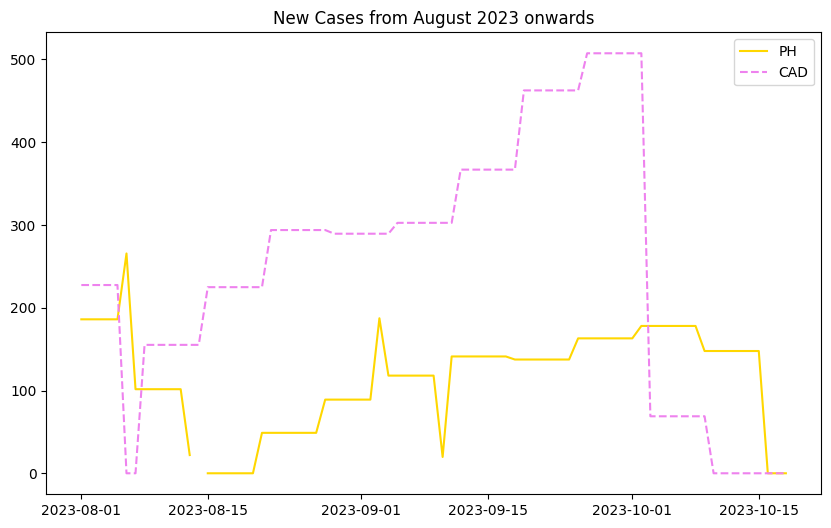

In [23]:
plt.figure(figsize=(10,6))
plt.plot(subset_PH['date'], subset_PH['new_cases_smoothed'], label='PH', color='gold')
plt.plot(subset_CAD['date'], subset_CAD['new_cases_smoothed'], label='CAD', linestyle='--', color='violet')
plt.title('New Cases from August 2023 onwards')
plt.legend()
plt.show()


As seen in the graph, it looks like there was a spike in the number cases in Canada around August then it suddenly plummeted down during October. As for the Philippines, it looked like there was an increase in cases around early August then it went to around zero and gradually increased starting late August and early September then it started to decrease after that.

### *To further investigate we will check the rate of change for the new cases in this period.*

In [24]:
subset_PH['ROC'] = (subset_PH['new_cases_smoothed'].diff() /subset_PH['new_cases_smoothed'].shift(1) )*100
subset_CAD['ROC'] = (subset_CAD['new_cases_smoothed'].diff() / subset_CAD['new_cases_smoothed'].shift(1)) * 100

<ipython-input-24-a7c551960f8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_PH['ROC'] = (subset_PH['new_cases_smoothed'].diff() /subset_PH['new_cases_smoothed'].shift(1) )*100
<ipython-input-24-a7c551960f8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_CAD['ROC'] = (subset_CAD['new_cases_smoothed'].diff() / subset_CAD['new_cases_smoothed'].shift(1)) * 100


In [25]:
subset_PH

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,ROC
246357,PHL,Asia,Philippines,2023-08-01,4172920.0,0.0,186.000,66592.0,50.0,7.143,...,78.463,1.0,71.23,0.718,115559008.0,NaN,NaN,NaN,NaN,NaN
246358,PHL,Asia,Philippines,2023-08-02,4172920.0,0.0,186.000,66626.0,34.0,12.000,...,78.463,1.0,71.23,0.718,115559008.0,NaN,NaN,NaN,NaN,0.0
246359,PHL,Asia,Philippines,2023-08-03,4172920.0,0.0,186.000,66626.0,0.0,12.000,...,78.463,1.0,71.23,0.718,115559008.0,NaN,NaN,NaN,NaN,0.0
246360,PHL,Asia,Philippines,2023-08-04,4172920.0,0.0,186.000,66626.0,0.0,12.000,...,78.463,1.0,71.23,0.718,115559008.0,NaN,NaN,NaN,NaN,0.0
246361,PHL,Asia,Philippines,2023-08-05,4172920.0,0.0,186.000,66626.0,0.0,12.000,...,78.463,1.0,71.23,0.718,115559008.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246431,PHL,Asia,Philippines,2023-10-14,4115714.0,0.0,147.714,66702.0,0.0,0.857,...,78.463,1.0,71.23,0.718,115559008.0,NaN,NaN,NaN,NaN,0.0
246432,PHL,Asia,Philippines,2023-10-15,4115714.0,0.0,147.714,66702.0,0.0,0.857,...,78.463,1.0,71.23,0.718,115559008.0,NaN,NaN,NaN,NaN,0.0
246433,PHL,Asia,Philippines,2023-10-16,4115714.0,0.0,0.000,66702.0,0.0,0.857,...,78.463,1.0,71.23,0.718,115559008.0,NaN,NaN,NaN,NaN,-100.0
246434,PHL,Asia,Philippines,2023-10-17,4115714.0,0.0,0.000,66702.0,0.0,0.000,...,78.463,1.0,71.23,0.718,115559008.0,NaN,NaN,NaN,NaN,NaN


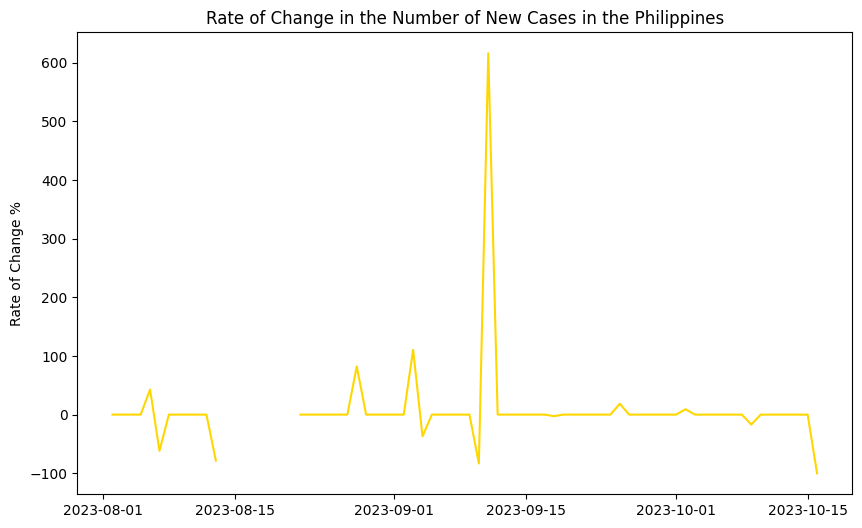

In [26]:
plt.figure(figsize=(10,6))
plt.plot(subset_PH['date'], subset_PH['ROC'], label='PH', color='gold')
plt.title('Rate of Change in the Number of New Cases in the Philippines')
plt.ylabel('Rate of Change %')
plt.show()

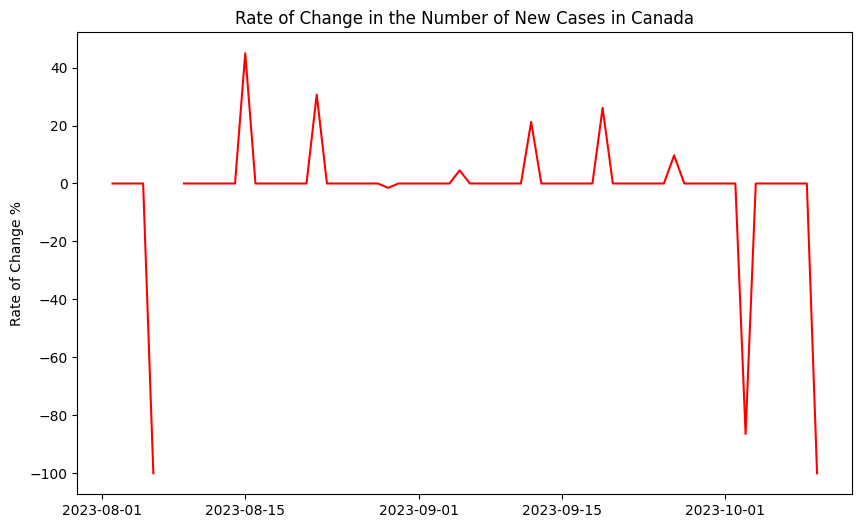

In [27]:
plt.figure(figsize=(10,6))
plt.plot(subset_CAD['date'], subset_CAD['ROC'], label='PH', color='Red')
plt.ylabel('Rate of Change %')
plt.title('Rate of Change in the Number of New Cases in Canada')
plt.show()

As seen in graphs for Rate of Change, there was a drop of the numbers for the Philippines in the early parts and then a sudden increase to 500% in the middle of September then it started to lower down at around August same as what the previous graph showed. As for Canada, it also showed a gradual increase during August-September then a very sudden drop on October same as what the previous graph showed.

In [28]:
subset_PH['7_day_avg'] = subset_PH['new_cases_smoothed'].rolling(window=7).mean()
subset_CAD['7_day_avg'] = subset_CAD['new_cases_smoothed'].rolling(window=7).mean()

<ipython-input-28-355e50ce88b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_PH['7_day_avg'] = subset_PH['new_cases_smoothed'].rolling(window=7).mean()
<ipython-input-28-355e50ce88b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_CAD['7_day_avg'] = subset_CAD['new_cases_smoothed'].rolling(window=7).mean()


In [31]:
subset_PH['7_day_std_dev'] = subset_PH['new_cases_smoothed'].rolling(window=7).std()
subset_CAD['7_day_std_dev'] = subset_CAD['new_cases_smoothed'].rolling(window=7).std()

<ipython-input-31-9f8d2c5d1b3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_PH['7_day_std_dev'] = subset_PH['new_cases_smoothed'].rolling(window=7).std()
<ipython-input-31-9f8d2c5d1b3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_CAD['7_day_std_dev'] = subset_CAD['new_cases_smoothed'].rolling(window=7).std()


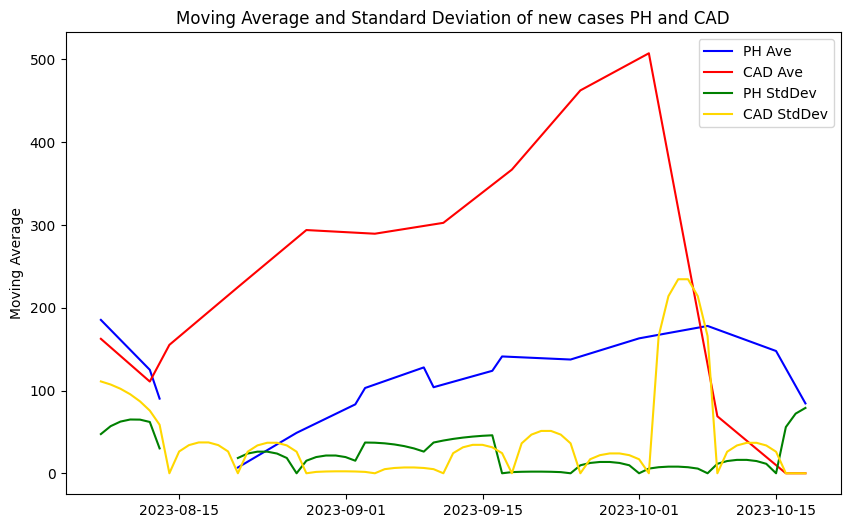

In [37]:
plt.figure(figsize=(10,6))
plt.plot(subset_CAD['date'], subset_PH['7_day_avg'], label='PH Ave', color='Blue')
plt.plot(subset_CAD['date'], subset_CAD['7_day_avg'], label='CAD Ave', color='Red')
plt.plot(subset_CAD['date'], subset_PH['7_day_std_dev'], label='PH StdDev', color='green')
plt.plot(subset_CAD['date'], subset_CAD['7_day_std_dev'], label='CAD StdDev', color='gold')
plt.legend()
plt.ylabel('Moving Average')
plt.title('Moving Average and Standard Deviation of new cases PH and CAD')
plt.show()

As seen here based on the Rolling Averages of the cases for the countries. Canada experienced a clear spike in its cases and the variability of the cases has also spiked during the same time the Averages increases (September to
early October) then the numbers dropped significantly after that. Which means based on this, graph that Canada really did experience a surge in cases during this time September to early October.

As for the case of the Philippines, shows an initial decline, a sudden increase and then a decline after that. and as seen for the standarad deviation, the rolling standard deviation also saw an increase around September indicating variability but it's not as clear cut as compared to that of Canada, although there might still be other factors that play a role into this.

As summary, most of the data and visualization shows that there were increase in the number of cases for both countries Around mid-late August and then a drop around early October. But as to say that there was a surge, it can be said that Canada definitely experienced a surge in the number of Covid-19 cases during that time but as for the Philippines it is not as clear cut. They had an increase in the number of cases but it was not as sharp as what Canada had experienced.


### **Final Thoughts**

I would have loved to take this further and do modeling for Time-Series Analysis but I am not that experienced yet with Time-Series Data, specially for modeling. I need to read more stats for that. I had fun analyzing this data and hope to do forecasting and modeling for this kinds of data soon.

## -END-